### Basic EDA and Visualization

1. Understanding the datasets - Basic infos
2. Data Quality Checks
    1. Missing Value
    2. Outlier Check
    3. Duplicate Check
    4. Dataset column type checks
3. Univariate, BiVariate, MultiVariate Analysis and Visualization

In [57]:
#loading the required packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import plotnine as p9 
from mizani.formatters import percent_format

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 


In [14]:
#loading the dataset 
raw_data = pd.read_csv('./data/raw_consumer_bank.csv')
print('The shape of the dataset :' + str(raw_data.shape))
raw_data.head()

The shape of the dataset :(10002, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


##### Missing value checks 

In [32]:
raw_data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [42]:
raw_data[raw_data.isna().any(axis=1)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
6,7,15592531,Bartlett,822,NaN,Male,50.0,7,0.00,2,1.0,1.0,10062.80,0
8,9,15792365,He,501,France,Male,44.0,4,142051.07,2,0.0,NaN,74940.50,0
9,10,15592389,H?,684,France,Male,NaN,2,134603.88,1,1.0,1.0,71725.73,0


In [44]:
raw_data = raw_data.dropna() # dropping the rows without analysis since nan is small %

##### Duplicate value checks

In [39]:
print(f'Number of duplicate rows : {str(raw_data.duplicated().sum())}')
raw_data[raw_data.duplicated(keep=False)]

Number of duplicate rows : 0


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [40]:
raw_data = raw_data.drop_duplicates(keep='first')
raw_data[raw_data.duplicated(keep=False)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


##### Dataframe summary and Column type checks

In [45]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9996 entries, 0 to 10000
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9996 non-null   int64  
 1   CustomerId       9996 non-null   int64  
 2   Surname          9996 non-null   object 
 3   CreditScore      9996 non-null   int64  
 4   Geography        9996 non-null   object 
 5   Gender           9996 non-null   object 
 6   Age              9996 non-null   float64
 7   Tenure           9996 non-null   int64  
 8   Balance          9996 non-null   float64
 9   NumOfProducts    9996 non-null   int64  
 10  HasCrCard        9996 non-null   float64
 11  IsActiveMember   9996 non-null   float64
 12  EstimatedSalary  9996 non-null   float64
 13  Exited           9996 non-null   int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [46]:
#Unique Values checks
raw_data.nunique()

RowNumber          9996
CustomerId         9996
Surname            2932
CreditScore         460
Geography             3
Gender                2
Age                  73
Tenure               11
Balance            6379
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9995
Exited                2
dtype: int64

In [47]:
#Checking the numeric and category columns
numCols = list(raw_data.select_dtypes(['integer','float']).dtypes.index)
catCols = list(raw_data.select_dtypes(['object']).dtypes.index)


print('Numeric Columns :' + str(numCols))
print('Object Columns :' + str(catCols))

Numeric Columns :['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
Object Columns :['Surname', 'Geography', 'Gender']


In [48]:
for col in catCols:
    uniqueValues = raw_data[col].unique()
    if len(uniqueValues) < 10:
        print(f'The unique Values in {col} : {str(uniqueValues)}')

The unique Values in Geography : ['France' 'Spain' 'Germany']
The unique Values in Gender : ['Female' 'Male']


In [53]:
raw_data = (raw_data.assign(
    Geography = raw_data.Geography.astype('category'),
    Gender = raw_data.Gender.astype('category'),
    Exited = raw_data.Exited.astype('category')
))
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9996 entries, 0 to 10000
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        9996 non-null   int64   
 1   CustomerId       9996 non-null   int64   
 2   Surname          9996 non-null   object  
 3   CreditScore      9996 non-null   int64   
 4   Geography        9996 non-null   category
 5   Gender           9996 non-null   category
 6   Age              9996 non-null   float64 
 7   Tenure           9996 non-null   int64   
 8   Balance          9996 non-null   float64 
 9   NumOfProducts    9996 non-null   int64   
 10  HasCrCard        9996 non-null   float64 
 11  IsActiveMember   9996 non-null   float64 
 12  EstimatedSalary  9996 non-null   float64 
 13  Exited           9996 non-null   category
dtypes: category(3), float64(5), int64(5), object(1)
memory usage: 966.8+ KB


##### Univariate, BiVariate and Multivariate analysis

In [60]:
#Checking the relationship between Chured flag (Exited) and Gender 
genderCT = pd.crosstab(index=raw_data['Gender'],columns=raw_data['Exited'],normalize="index")
genderCT


Exited,0,1
Gender,,
Female,0.749229,0.250771
Male,0.835350,0.164650


In [61]:
geoCT = pd.crosstab(index=raw_data['Geography'],columns=raw_data['Exited'],normalize="index")
geoCT


Exited,0,1
Geography,,
France,0.838356,0.161644
Germany,0.675568,0.324432
Spain,0.833199,0.166801


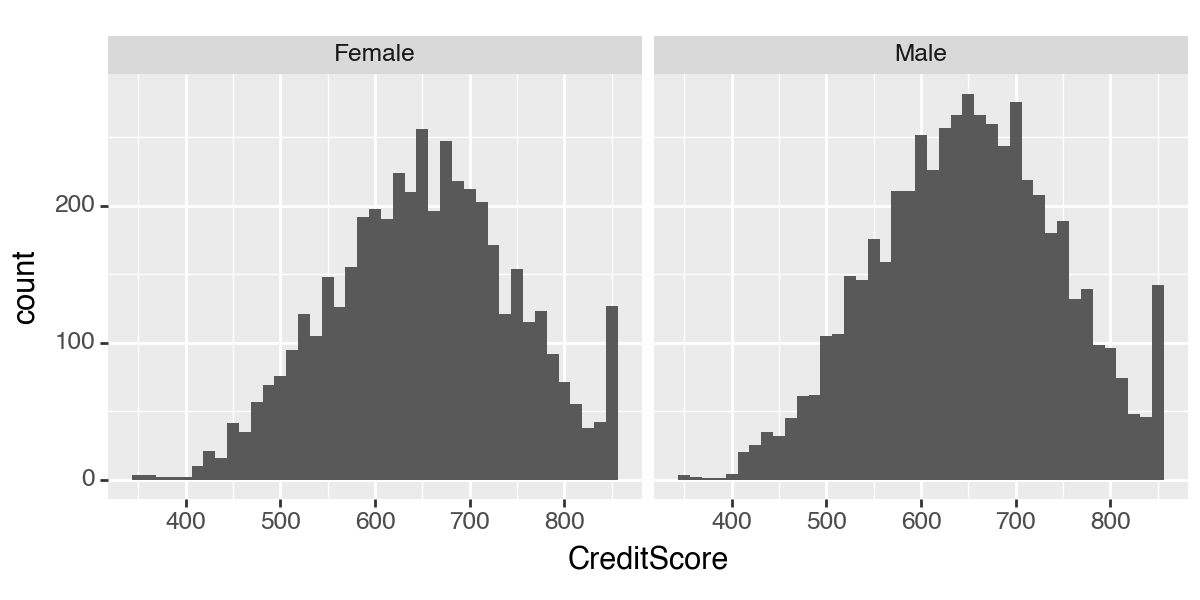

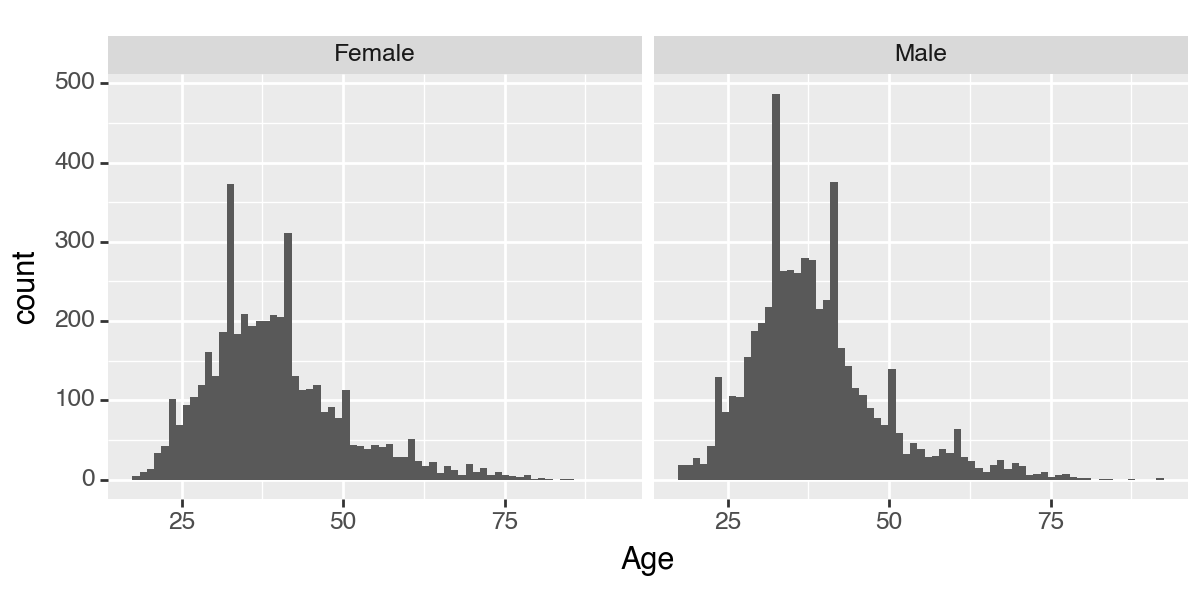

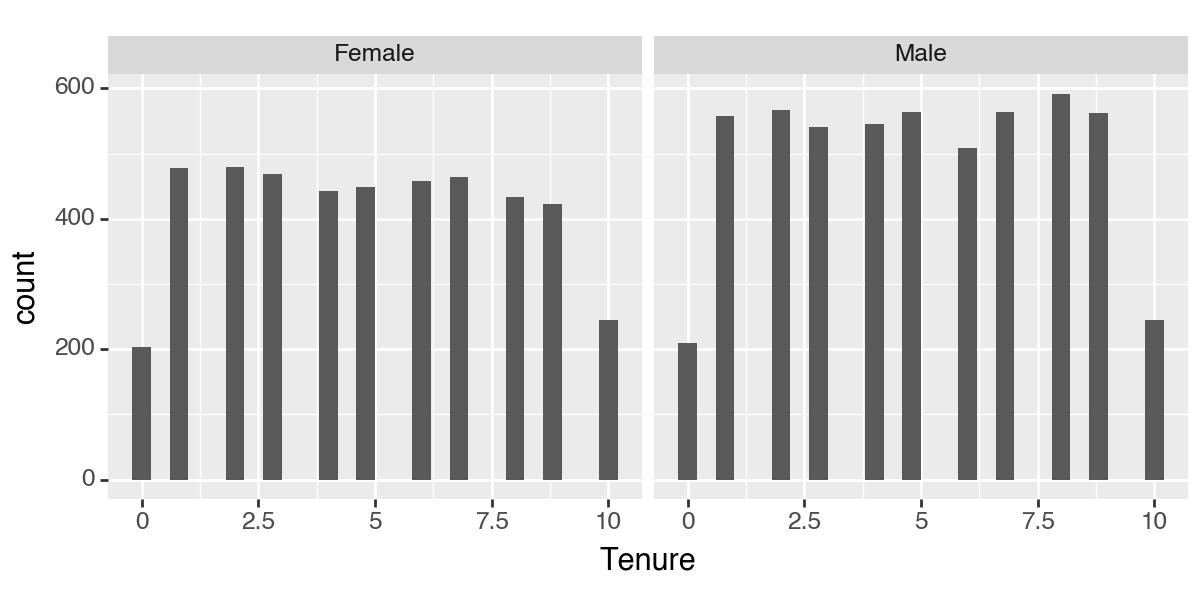

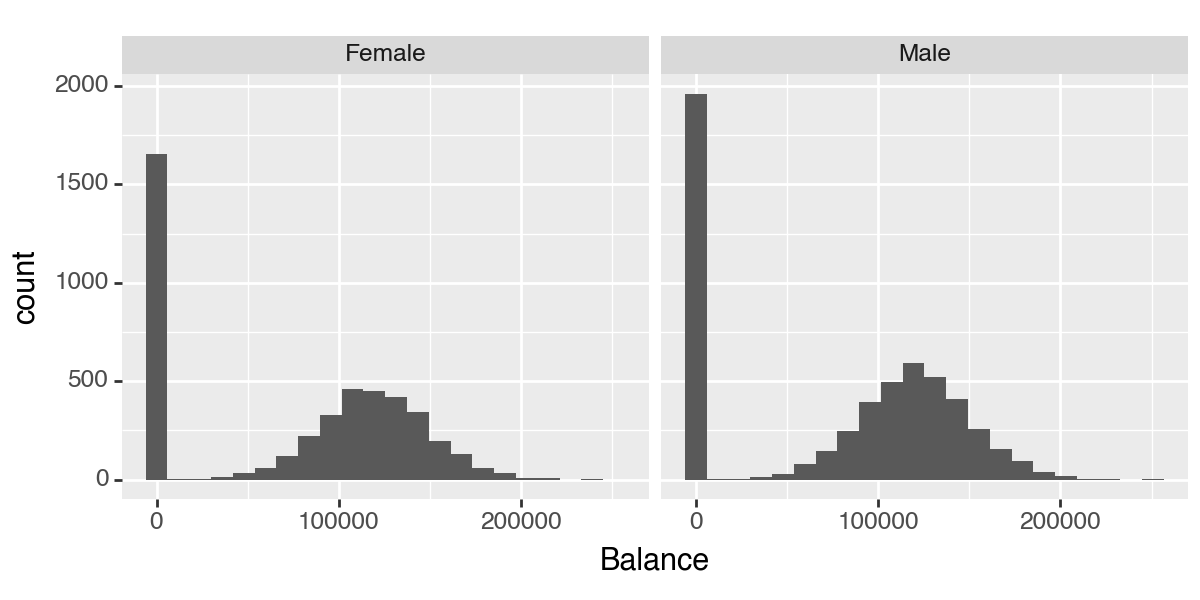

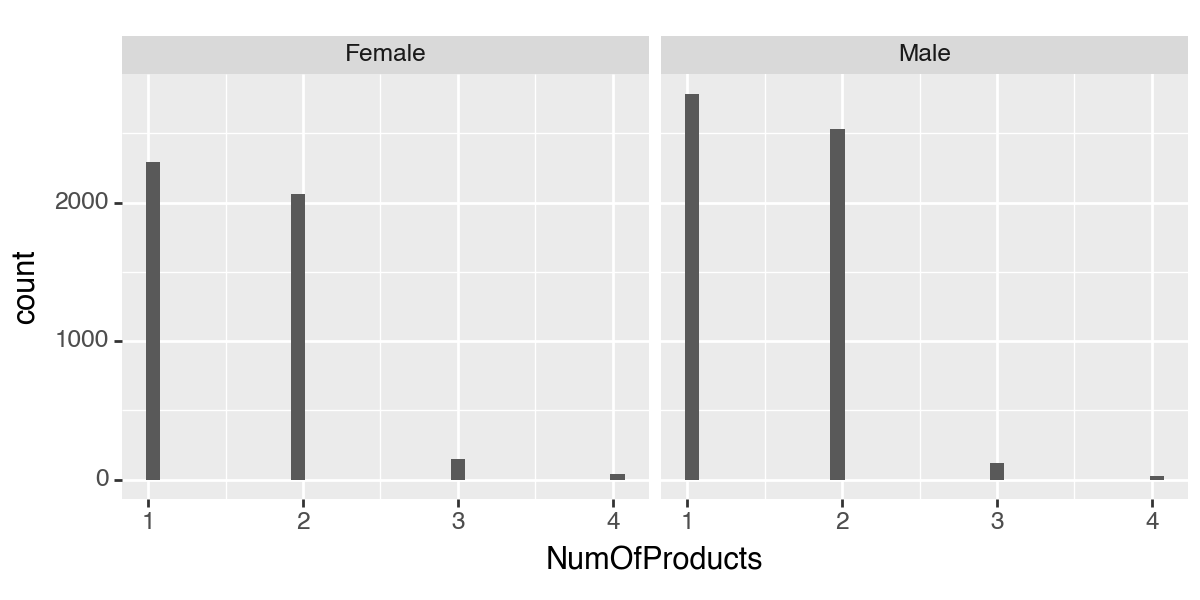

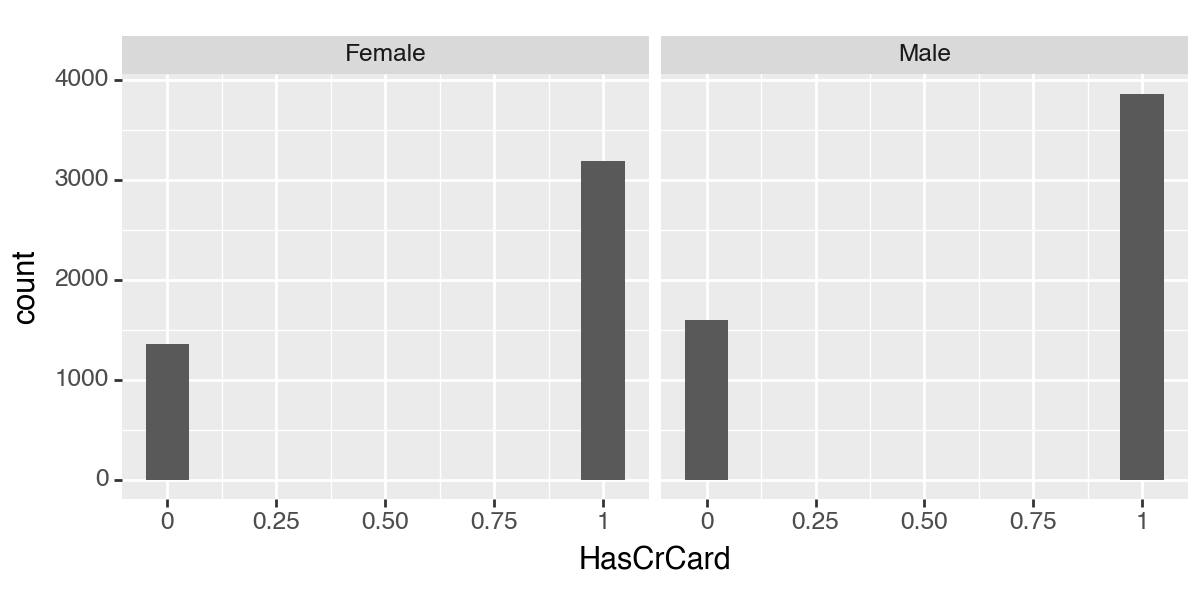

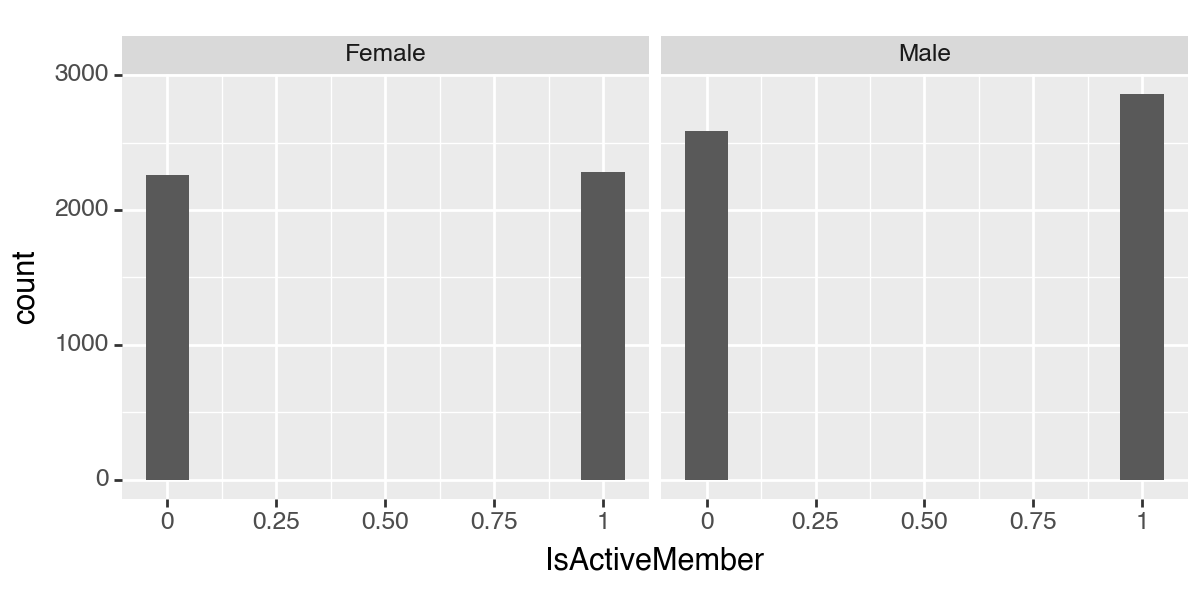

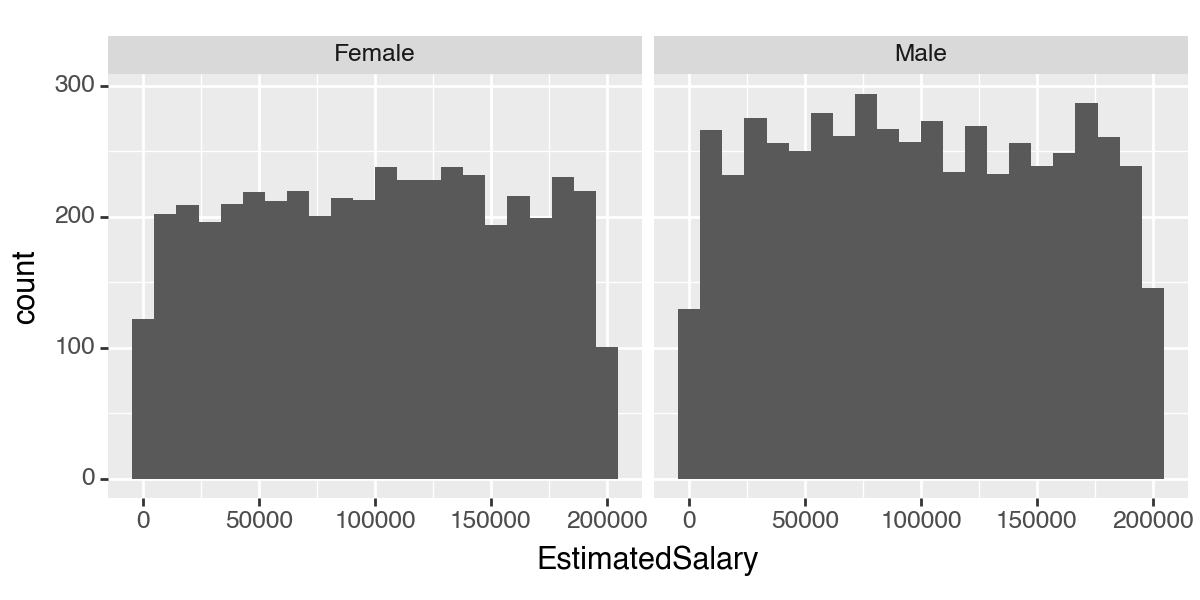

In [67]:
#Checking the distribution for numerical variables 
#['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
#Variables of Interest : 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'
interestVar = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
for var in interestVar:
    print(
        (
             p9.ggplot(raw_data)
            +p9.aes(x=var)
            +p9.geom_histogram()
            +p9.theme(figure_size=(6,3))
            +p9.facet_wrap("Gender")
        )
    )

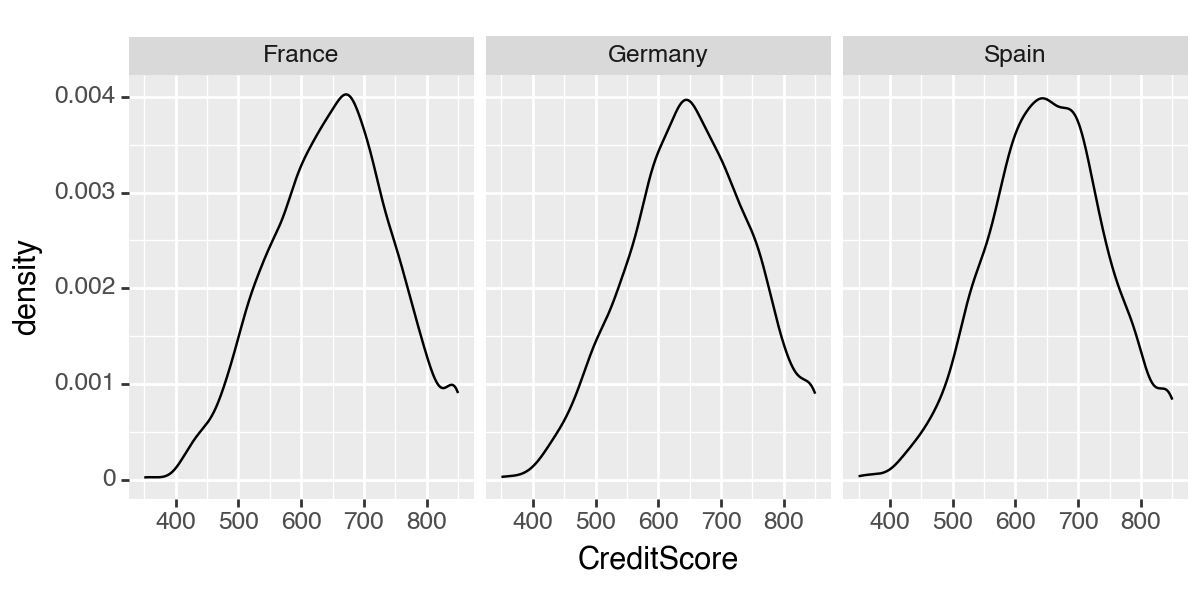

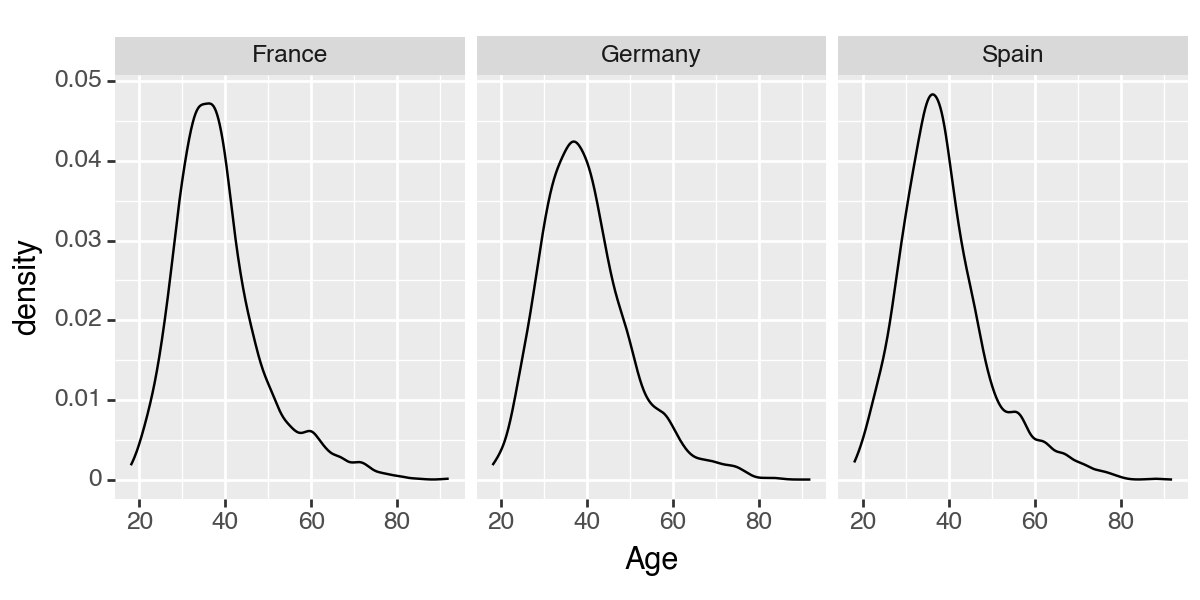

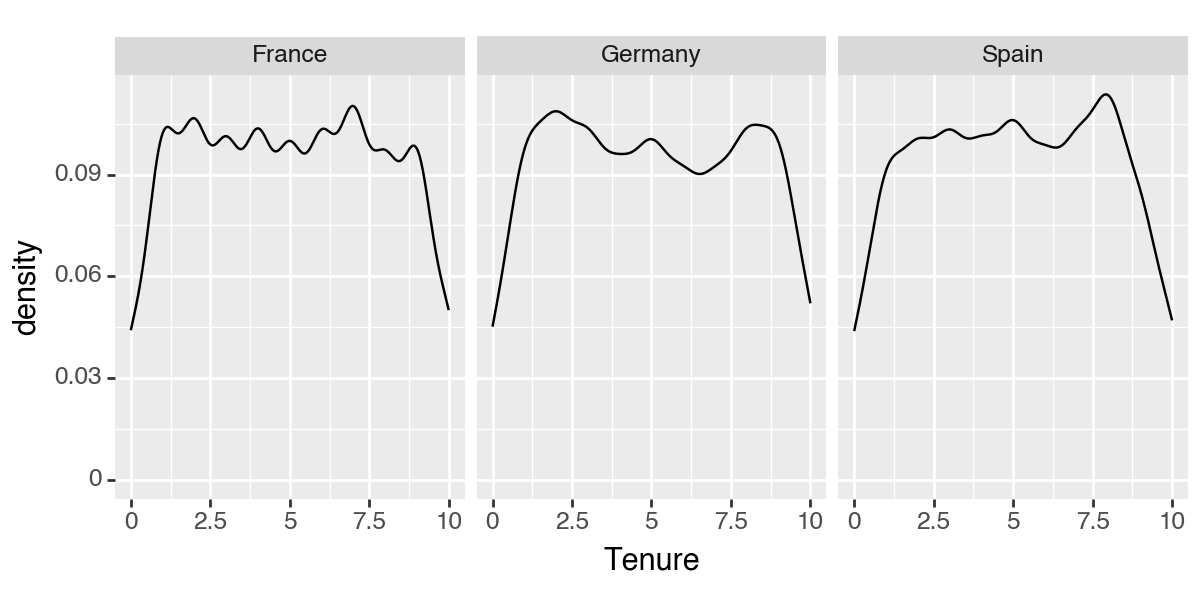

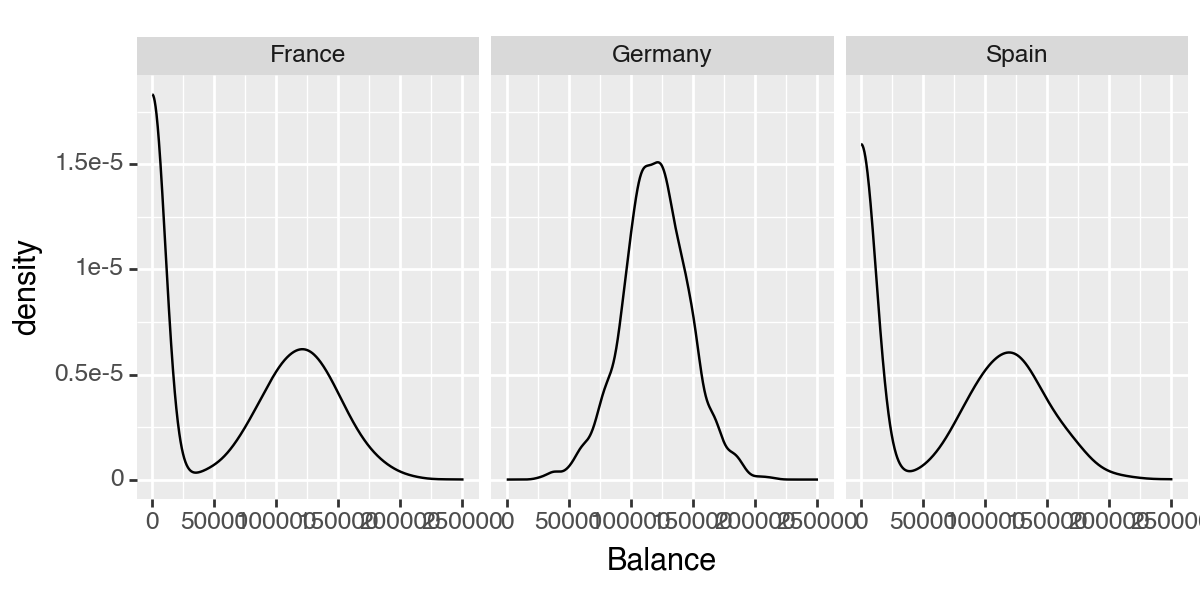

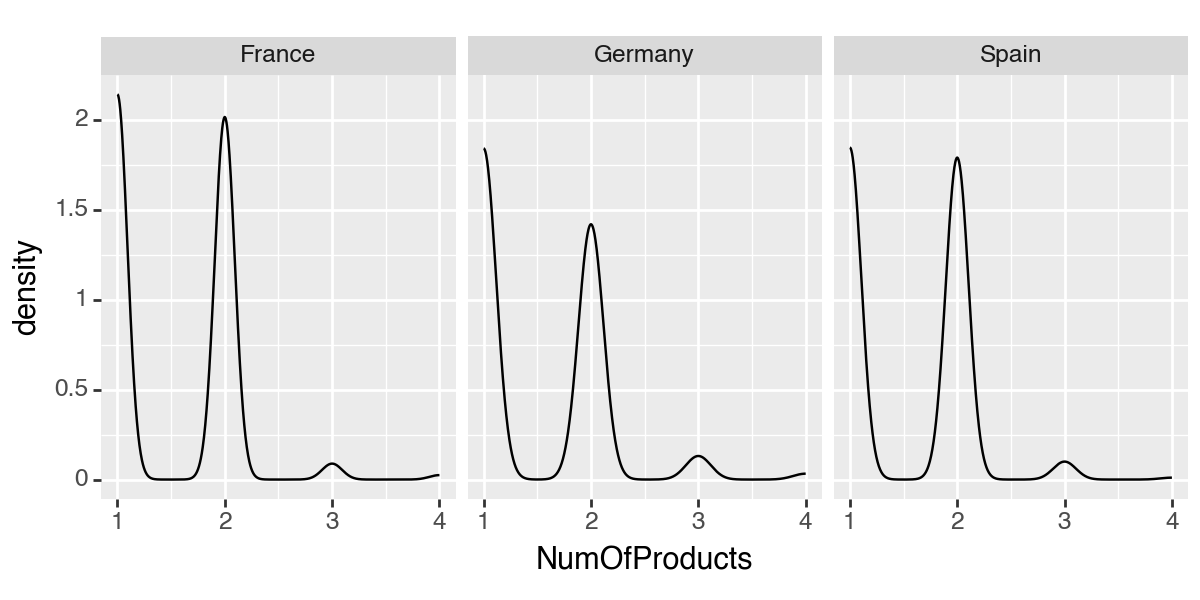

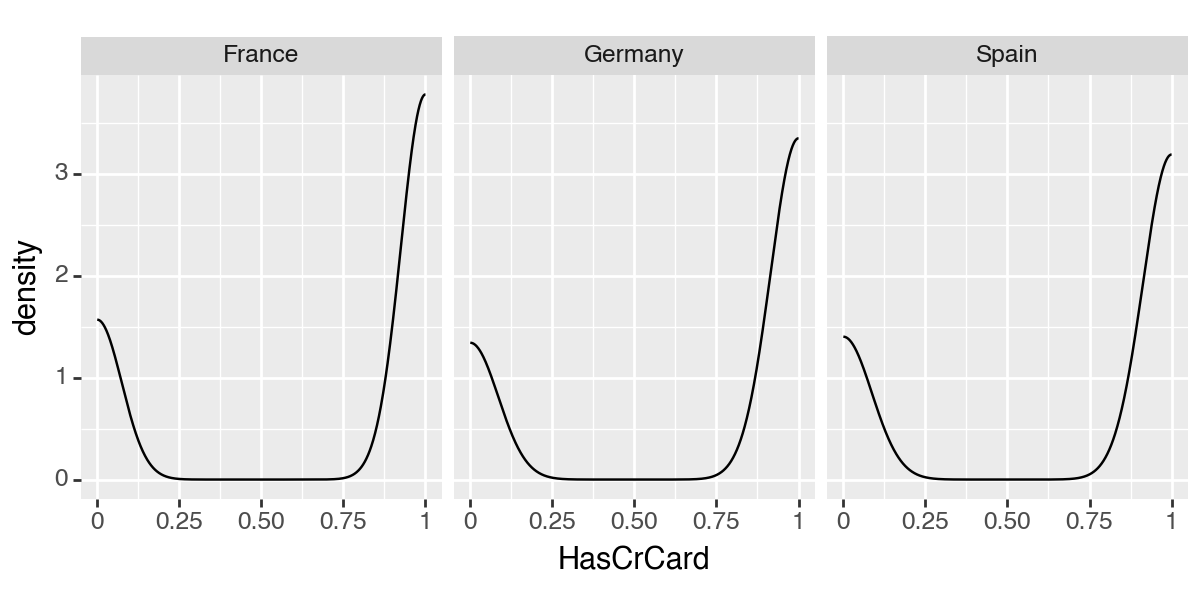

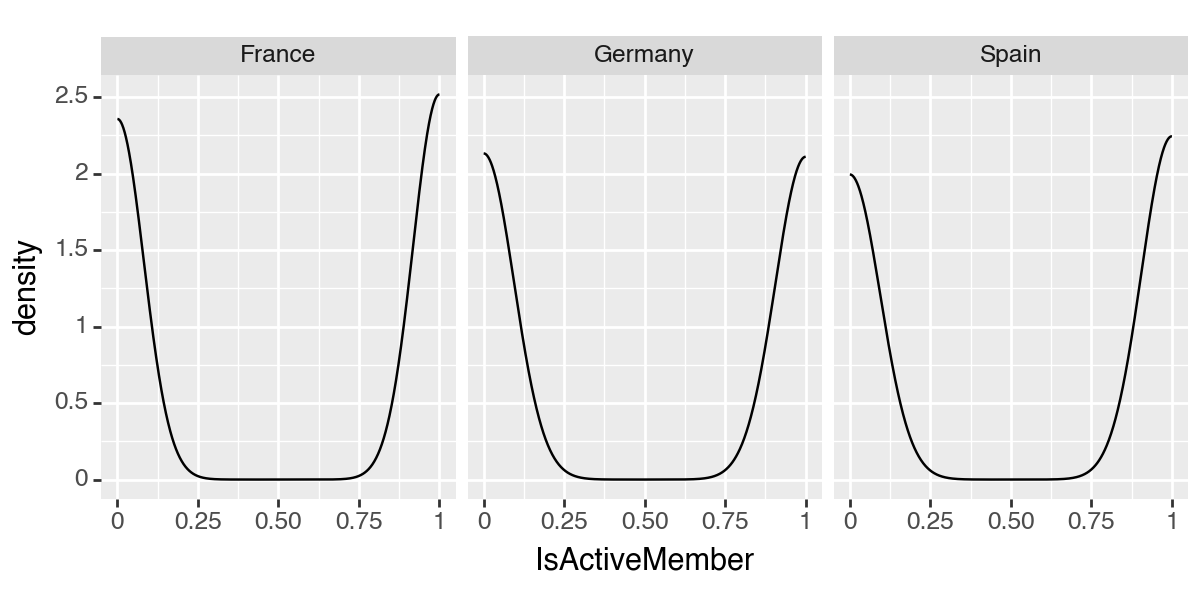

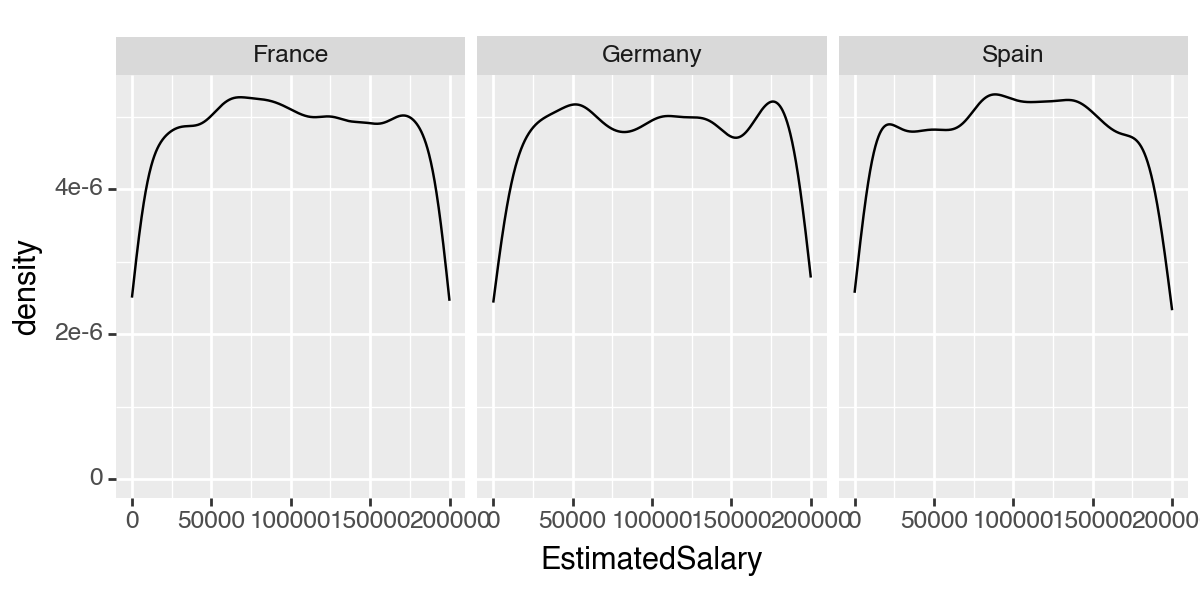

In [69]:
interestVar = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
for var in interestVar:
    print(
        (
             p9.ggplot(raw_data)
            +p9.aes(x=var)
            +p9.geom_density(alpha=0.05)
            +p9.theme(figure_size=(6,3))
            +p9.facet_wrap("Geography")
        )
    )

In [70]:
raw_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1


In [74]:
raw_data.to_csv('data/processed_data.csv',index=False)

In [77]:
proc_df = pd.read_csv('data/processed_data.csv')
proc_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
